# Generate dataset random effect
## 1 factors, 1 continuos predictor, random effect
Reference: http://www.flutterbys.com.au/stats/tut/tut9.1.html

$y_{block} = q_{block} + m_{block}\cdot\ x_{block}$

Hence the design matrix is $y \sim block + block:x$ and the vector to be mulitplied with will have a list of the intercepts for each block, following a list of slopes for each block. The effect of x, changes with the block, and this change is the slopes set for a particular block

In [265]:
import pandas as pd
import numpy as np
np.random.seed(1)
 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pymc3 as pm
import patsy

### Data generation

In [266]:
n_groups = 6
n_sample = 50
n = n_groups * n_sample

labels_block = ['Block{}'.format(i+1) for i in range(n_groups)]

block = np.repeat(labels_block, repeats=n_sample)

In [267]:
x = np.random.uniform(low=0, high=70, size=n)

In [268]:
Xmat_intercept = patsy.dmatrix('-1 + block + x', data={'block':block, 'x':x}, return_type='dataframe')
Xmat_intercept_slope = patsy.dmatrix('-1 + block*x - x', data={'block':block, 'x':x}, return_type='dataframe')

Xmat_intercept.head()
Xmat_intercept_slope.head()

,block[Block1],block[Block2],block[Block3],block[Block4],block[Block5],block[Block6],block[Block1]:x,block[Block2]:x,block[Block3]:x,block[Block4]:x,block[Block5]:x,block[Block6]:x
0,1.0,0.0,0.0,0.0,0.0,0.0,29.191540,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,50.422715,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.008006,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,21.163280,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,10.272912,0.0,0.0,0.0,0.0,0.0


In [269]:
intercept_mean = 230
intercept_sd = 10

slope_mean = 1
slope_sd = 0.5

intercept_effect = np.random.normal(loc=intercept_mean, scale=intercept_sd, size=n_groups)
slope_effect =  np.random.normal(loc=slope_mean, scale=slope_sd, size=n_groups)

all_effects = np.concatenate((intercept_effect, slope_effect), axis=0)
all_effects

array([2.32426694e+02, 2.32018302e+02, 2.36610203e+02, 2.47921582e+02,
       2.28795354e+02, 2.17668793e+02, 4.08840937e-01, 6.67122741e-01,
       1.62902096e-01, 1.41251491e+00, 7.50893218e-01, 8.44507511e-01])

In [270]:
lin_pred_intercept = np.dot(Xmat_intercept, all_effects[0:7]) # here I pick only one value of slope
lin_pred_intercept_slope = np.dot(Xmat_intercept_slope, all_effects)

lin_pred_intercept

array([244.3613911 , 253.04156426, 232.42996769, 241.07910967,
       236.62668152, 235.06932024, 237.75725036, 242.31625041,
       243.78172942, 247.84701809, 244.42356587, 252.03689918,
       238.27788586, 257.55741928, 233.21049626, 251.61471396,
       244.36948445, 248.41576351, 236.44440933, 238.0961343 ,
       255.34309558, 260.13724229, 241.39653883, 252.24018228,
       257.50795775, 258.02932225, 234.86056326, 233.544398  ,
       237.28704836, 257.55813667, 235.24126923, 244.47831692,
       259.84040611, 247.68528003, 252.22743253, 241.45639384,
       252.07357218, 256.31273432, 232.95008416, 253.89497372,
       260.72677698, 253.8383467 , 240.45268332, 255.01497341,
       235.38090562, 245.24489903, 258.42966697, 240.82959825,
       240.66249814, 236.14796464, 232.57256215, 251.44580465,
       238.07485839, 239.61794594, 246.08656795, 233.54547729,
       248.44889636, 236.21750715, 248.88355773, 252.04459223,
       234.94699705, 243.86811444, 251.89124656, 243.87

In [271]:
eps = np.random.normal(loc=0, scale=2, size=n)

y_intercept = lin_pred_intercept + eps
y_intercept_slope = lin_pred_intercept_slope + eps

data_hier_intercept = pd.DataFrame({'y':y_intercept, 'x':x, 'block':block})
data_hier_intercept_slope = pd.DataFrame({'y':y_intercept_slope, 'x':x, 'block':block})

data_hier_intercept.head()

,block,x,y
0,Block1,29.191540,244.357608
1,Block1,50.422715,250.248323
2,Block1,0.008006,230.707335
3,Block1,21.163280,242.428533
4,Block1,10.272912,237.863760


In [272]:
data_hier_intercept_slope.head()

,block,x,y
0,Block1,29.191540,244.357608
1,Block1,50.422715,250.248323
2,Block1,0.008006,230.707335
3,Block1,21.163280,242.428533
4,Block1,10.272912,237.863760


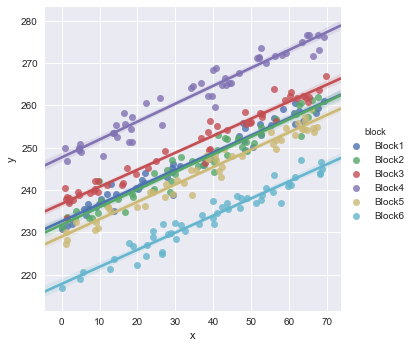

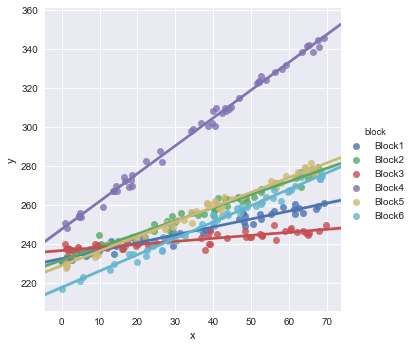

In [273]:
sns.lmplot(x='x', y='y', hue='block', data=data_hier_intercept)
sns.lmplot(x='x', y='y', hue='block', data=data_hier_intercept_slope)

## Randomized complete block
reference: http://www.flutterbys.com.au/stats/tut/tut9.3b.html

In [274]:
nTreat = 3
nBlock = 10
sigma = 5
sigma_block = 12
n = nBlock*nTreat

In [275]:
labels_block = ['Block0{}'.format(i+1) for i in range(nBlock)]
block = np.repeat(labels_block, repeats=1)
block

array(['Block01', 'Block02', 'Block03', 'Block04', 'Block05', 'Block06',
       'Block07', 'Block08', 'Block09', 'Block010'], dtype='<U8')

In [276]:
labels_A = ['A{}'.format(i+1) for i in range(nTreat)]
A = np.repeat(labels_A, repeats=1)
A

array(['A1', 'A2', 'A3'], dtype='<U2')

In [277]:
import itertools
dt = pd.DataFrame([row for row in itertools.product(labels_A, labels_block)], columns=['A', 'Block'])
dt.head()

,A,Block
0,A1,Block01
1,A1,Block02
2,A1,Block03
3,A1,Block04
4,A1,Block05


In [278]:
Xmat = patsy.dmatrix('-1 + Block + A', data=dt, return_type='dataframe')
Xmat.head()

,Block[Block01],Block[Block010],Block[Block02],Block[Block03],Block[Block04],Block[Block05],Block[Block06],Block[Block07],Block[Block08],Block[Block09],A[T.A2],A[T.A3]
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [279]:
block_effects = np.random.normal(size=nBlock, loc=40, scale=sigma_block)
A_effects = np.array([30, 40]) # the average in A is 40, 70, 80. Here I set the difference, which is the effect size

all_effects = np.concatenate((block_effects, A_effects))

In [280]:
lin_pred = np.dot(Xmat, all_effects)
lin_pred

array([21.21114219, 13.27464842, 19.60799674, 36.68984725, 54.74746703,
       55.71647087, 26.14020838, 37.86841365, 21.8745235 , 52.1658696 ,
       51.21114219, 43.27464842, 49.60799674, 66.68984725, 84.74746703,
       85.71647087, 56.14020838, 67.86841365, 51.8745235 , 82.1658696 ,
       61.21114219, 53.27464842, 59.60799674, 76.68984725, 94.74746703,
       95.71647087, 66.14020838, 77.86841365, 61.8745235 , 92.1658696 ])

In [281]:
# alternative
Xmat = pd.concat((patsy.dmatrix('-1 + Block', data=dt, return_type='dataframe'), 
    patsy.dmatrix('-1 + A', data=dt, return_type='dataframe')), 
    axis=1)

Xmat.head()

,Block[Block01],Block[Block010],Block[Block02],Block[Block03],Block[Block04],Block[Block05],Block[Block06],Block[Block07],Block[Block08],Block[Block09],A[A1],A[A2],A[A3]
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [282]:
## Sum to zero block effects
block_effects = np.random.normal(size=nBlock, loc=0, scale=sigma_block)
A_effects = np.array([40, 70, 80])
all_effects = np.concatenate((block_effects, A_effects))
lin_pred = np.dot(Xmat, all_effects)
lin_pred

array([52.13448477, 38.28165106, 52.39580535, 37.33103166, 57.64192413,
       29.55990132, 44.43028563, 50.23938623, 38.32345923, 22.28124807,
       82.13448477, 68.28165106, 82.39580535, 67.33103166, 87.64192413,
       59.55990132, 74.43028563, 80.23938623, 68.32345923, 52.28124807,
       92.13448477, 78.28165106, 92.39580535, 77.33103166, 97.64192413,
       69.55990132, 84.43028563, 90.23938623, 78.32345923, 62.28124807])

In [283]:
## the quadrat observations (within sites) are drawn from
## normal distributions with means according to the site means
## and standard deviations of 5
y = np.random.normal(size=n, loc=lin_pred, scale=sigma)
dt['y'] = y

dt.head()

,A,Block,y
0,A1,Block01,59.066056
1,A1,Block02,41.022299
2,A1,Block03,44.208557
3,A1,Block04,57.124045
4,A1,Block05,60.885142


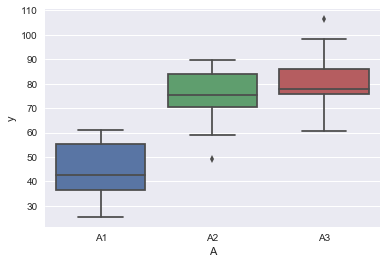

In [284]:
sns.boxplot(x='A', y='y', data=dt)

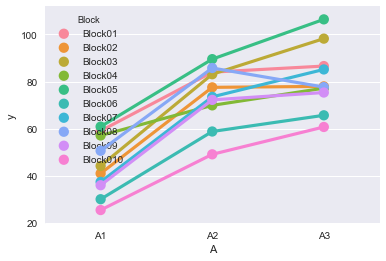

In [285]:
sns.pointplot(x='A', y='y', hue='Block', data=dt)

## Nested ANOVA
reference: http://www.flutterbys.com.au/stats/tut/tut9.2b.html

In [372]:
nTreat = 3
nSites = 9
nSitesPerTreat = nSites/nTreat
nQuads = 5
site_sigma = 10
sigma = 5
n = nSites*nQuads

In [373]:
labels_sites = ['S0{}'.format(i+1) for i in range(nSites)]
sites = np.repeat(labels_sites, repeats=nQuads)
sites

array(['S01', 'S01', 'S01', 'S01', 'S01', 'S02', 'S02', 'S02', 'S02',
       'S02', 'S03', 'S03', 'S03', 'S03', 'S03', 'S04', 'S04', 'S04',
       'S04', 'S04', 'S05', 'S05', 'S05', 'S05', 'S05', 'S06', 'S06',
       'S06', 'S06', 'S06', 'S07', 'S07', 'S07', 'S07', 'S07', 'S08',
       'S08', 'S08', 'S08', 'S08', 'S09', 'S09', 'S09', 'S09', 'S09'],
      dtype='<U3')

In [374]:
labels_A = ['A0{}'.format(i+1) for i in range(nTreat)]
A = np.repeat(labels_A, repeats=nSitesPerTreat*nQuads)
A

array(['A01', 'A01', 'A01', 'A01', 'A01', 'A01', 'A01', 'A01', 'A01',
       'A01', 'A01', 'A01', 'A01', 'A01', 'A01', 'A02', 'A02', 'A02',
       'A02', 'A02', 'A02', 'A02', 'A02', 'A02', 'A02', 'A02', 'A02',
       'A02', 'A02', 'A02', 'A03', 'A03', 'A03', 'A03', 'A03', 'A03',
       'A03', 'A03', 'A03', 'A03', 'A03', 'A03', 'A03', 'A03', 'A03'],
      dtype='<U3')

In [375]:
A_means = np.array([40, 70, 80])
A_means

array([40, 70, 80])

In [376]:
## the site means (treatment effects) are drawn from normal distributions
## with means of 40, 70 and 80 and standard deviations of 12
A_effects = np.random.normal(size=nSites, 
                             loc=np.repeat(A_means, nSitesPerTreat),
                             scale=site_sigma)
A_effects

array([47.58637063, 40.32615483, 27.22363665, 76.58536872, 79.98901649,
       76.67879561, 79.69703221, 71.6395052 , 81.07594938])

In [377]:
Xmat = patsy.dmatrix('sites - 1', data={'sites':sites}, return_type='dataframe')
lin_pred = np.dot(Xmat, A_effects)
lin_pred

array([47.58637063, 47.58637063, 47.58637063, 47.58637063, 47.58637063,
       40.32615483, 40.32615483, 40.32615483, 40.32615483, 40.32615483,
       27.22363665, 27.22363665, 27.22363665, 27.22363665, 27.22363665,
       76.58536872, 76.58536872, 76.58536872, 76.58536872, 76.58536872,
       79.98901649, 79.98901649, 79.98901649, 79.98901649, 79.98901649,
       76.67879561, 76.67879561, 76.67879561, 76.67879561, 76.67879561,
       79.69703221, 79.69703221, 79.69703221, 79.69703221, 79.69703221,
       71.6395052 , 71.6395052 , 71.6395052 , 71.6395052 , 71.6395052 ,
       81.07594938, 81.07594938, 81.07594938, 81.07594938, 81.07594938])

In [378]:
y = np.random.normal(size=n, loc=lin_pred, scale=sigma)
y

array([49.72099227, 45.79342664, 50.60155018, 49.1585303 , 49.25194338,
       30.16345589, 45.7316198 , 48.94811343, 38.31381671, 32.94165993,
       30.41828325, 24.89533799, 22.38857479, 33.31221793, 20.30673989,
       80.17251183, 70.34669811, 83.89670863, 79.16813105, 75.29839373,
       80.73586628, 82.89945343, 84.13848838, 84.12797363, 82.72266782,
       74.2918873 , 79.99919335, 70.1221737 , 81.69926114, 81.0438248 ,
       86.66743742, 76.75313417, 80.6280907 , 83.98846221, 81.2863216 ,
       69.50616878, 73.17616053, 71.97966537, 76.61802491, 68.49719244,
       82.77338841, 82.54060501, 84.86259   , 80.71148816, 81.71252256])

In [379]:
data_nest = pd.DataFrame({'y':y, 'A':A, 'Sites':sites, 'Quads': np.arange(y.shape[0])+1})
data_nest.head(10)

,A,Quads,Sites,y
0,A01,1,S01,49.720992
1,A01,2,S01,45.793427
2,A01,3,S01,50.601550
3,A01,4,S01,49.158530
4,A01,5,S01,49.251943
5,A01,6,S02,30.163456
6,A01,7,S02,45.731620
7,A01,8,S02,48.948113
8,A01,9,S02,38.313817
9,A01,10,S02,32.941660


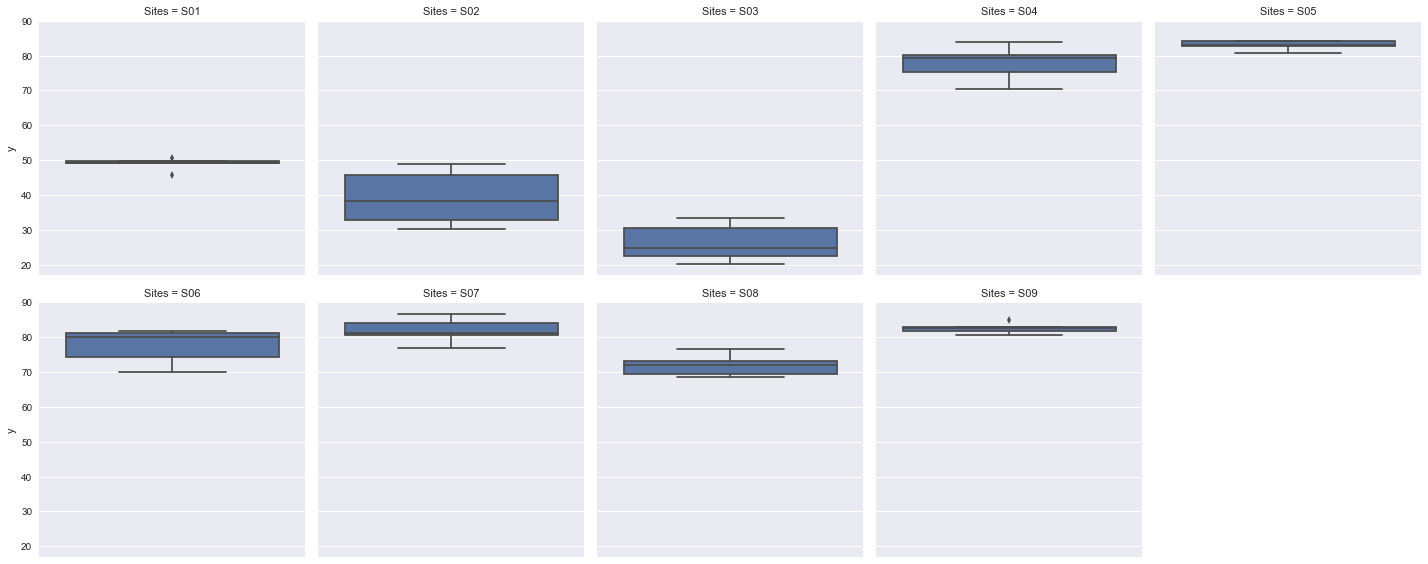

In [380]:
sns.factorplot(y='y', col='Sites', data=data_nest, kind='box', col_wrap=5)

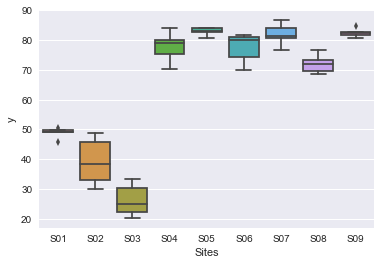

In [381]:
sns.boxplot(y='y', x='Sites', data=data_nest)

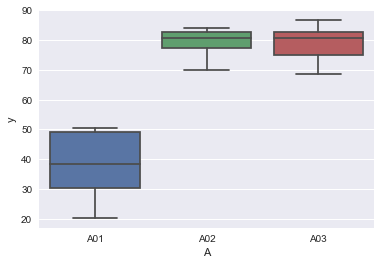

In [382]:
sns.boxplot(y='y', x='A', data=data_nest)